<a href="https://colab.research.google.com/github/nurindahpratiwi/CRAFT/blob/main/CRAFT_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [2]:
pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?id=1Oy-U8wc64sWEftGuBDwgVagfbEQImbgl&export=download'

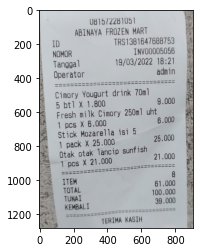

In [9]:
IMAGE_URL = 'https://raw.githubusercontent.com/nurindahpratiwi/CRAFT/main/source/13.jpeg'


image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p {download_dir} && rm -rf {download_dir}/*
!wget -q -P {download_dir} {IMAGE_URL}
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

In [10]:
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --test_folder=/content/images

Loading weights from checkpoint (../craft_mlt_25k.pth)
elapsed time : 1.2758922576904297s


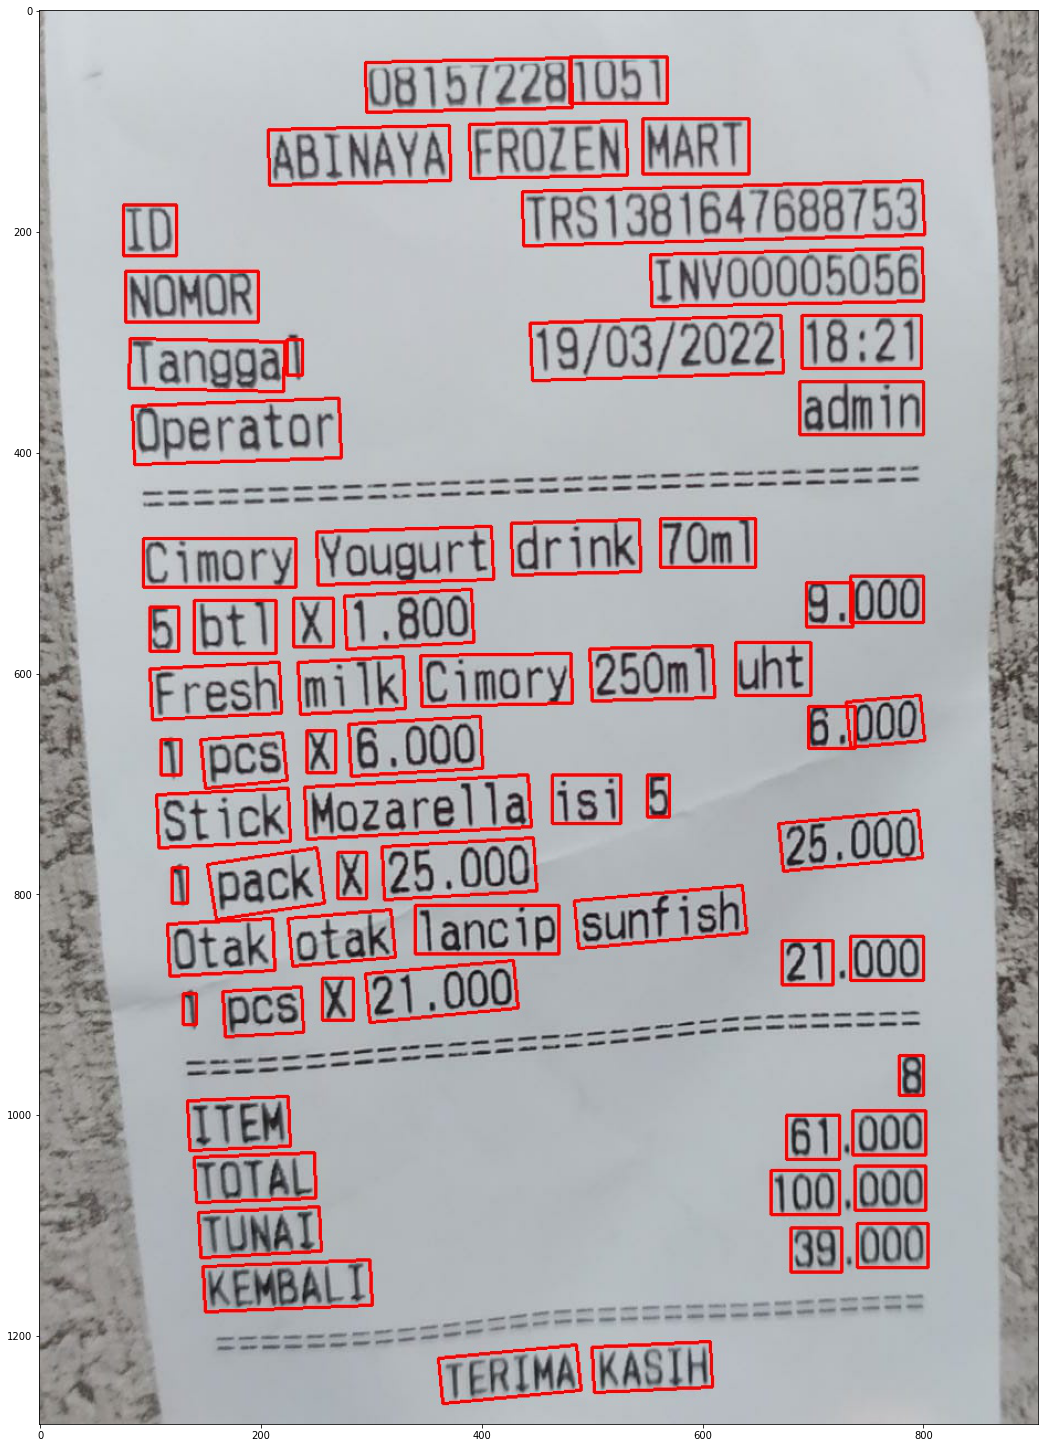

In [12]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread(join(project_name, 'result','res_'+image_file_name)))